In [2]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GPU available:  True
OS:  win32


In [11]:
model=model_actions.load("checkpoints/bs_128_sch_plateau/bs_128_sch_plateau_epoch_160")

In [12]:
conv_w=[]
for name, param in model.named_parameters():
    if "conv" in name and param.size()[2] == 3: # kernels 3x3
        for i in param.tolist():
            for j in i:
                conv_w.append(j)

In [13]:
conv_w_flat = np.array(conv_w).flatten()

In [14]:
print(min(conv_w_flat))
print(max(conv_w_flat))
print(conv_w_flat.mean())
print(conv_w_flat.std())

-0.5033373236656189
0.4561920464038849
-0.00017370819079944112
0.00780817245143656


In [18]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

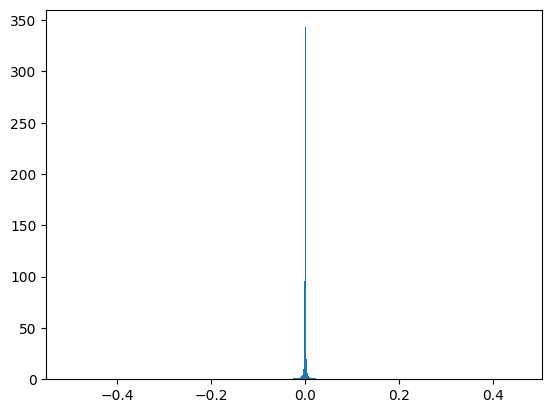

In [19]:
_=plt.hist(conv_w_flat, bins=500, density=True)

# reviewing weights as the train progresses

In [3]:

w_dict={}
w_dict["min"]=[]
w_dict["max"]=[]
w_dict["mean"]=[]
w_dict["std"]=[]
for i in range(1,161):
    if i%20==0:
        model=model_actions.load("checkpoints/bs_128_sch_plateau/bs_128_sch_plateau_epoch_"+str(i))
        model.eval()
        conv_w=[]
        for name, param in model.named_parameters():
            if "conv" in name and param.size()[2] == 3: # kernels 3x3
                for i in param.tolist():
                    for j in i:
                        conv_w.append(j)

        conv_w_flat = np.array(conv_w).flatten()

        w_dict["min"].append(min(conv_w_flat))
        w_dict["max"].append(max(conv_w_flat))
        w_dict["mean"].append(conv_w_flat.mean())
        w_dict["std"].append(conv_w_flat.std())


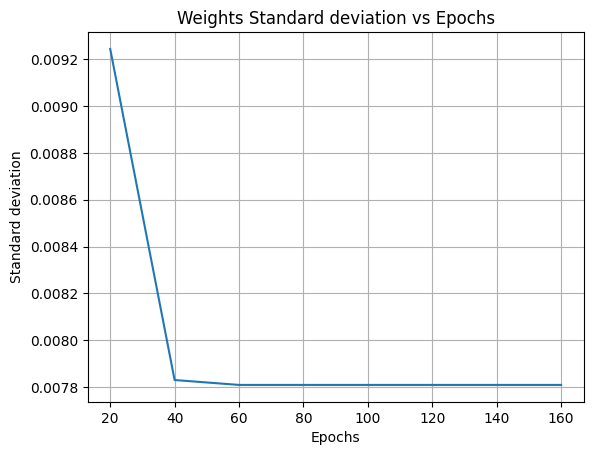

In [4]:
x=np.array(range(1,9))*20
plt.plot(x,w_dict["std"])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Standard deviation")
plt.title("Weights Standard deviation vs Epochs")
plt.show()

In [11]:

my_dict={}
my_dict["my"]="test"

# Weight stats for progressive training

In [ ]:
#training progressive weight stats (ws)
total_epochs=5
step=101

sch="plateau"
bs=128
wd=5e-5
m=0.9

name="bs_"+str(bs) + "progressive_weight_stats"

save_folder=name+"/"+name
net=models.resnet18(num_classes=10)
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=m, weight_decay=wd)

if sch=="cosine":
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)
elif sch=="plateau":
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
elif sch=="exp":
    # Decay LR by a factor of 0.1 every 7 epochs
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model_actions.progressive_train_ws(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=scheduler)